# Import

In [1]:
!pip install gcm-filters

In [2]:
!pip install seawater

In [3]:
import s3fs
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import gcm_filters
from xhistogram.xarray import histogram
import seawater as sw

# Plotting params

In [4]:
plt.rcParams['figure.figsize'] = (8,5)

In [5]:
%matplotlib inline

# Load data

Load Pangeo catalog

In [6]:
from validate_catalog import all_params
params_dict, cat = all_params()
params_dict.keys()

dict_keys(['GIGATL', 'HYCOM25', 'HYCOM50', 'eNATL60', 'FESOM', 'ORCA36', 'FIO-COM32'])

Winter data:

In [7]:
enatl01w = cat.eNATL60(region='1',datatype='surface_hourly', season='fma').to_dask()

In [8]:
enatl01w

<xarray.Dataset>
Dimensions:        (time_counter: 2136, x: 611, y: 763)
Coordinates: (12/15)
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    ...             ...
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: x, y
Data variables: (12/13)
    fmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    qt_oce         (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    somecrty       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sometauy       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosaline       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sossheig       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    ...             ...
    sowaflup       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozocrtx       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozotaux       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    tmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    umask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    vmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>

Summer data:

In [9]:
enatl01s = cat.eNATL60(region='1',datatype='surface_hourly', season='aso').to_dask()

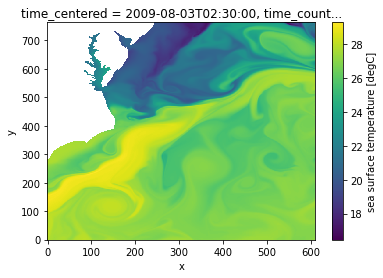

In [10]:
enatl01s.sosstsst.isel(time_counter=50).plot()

# Prepare data

In [11]:
enatl01w

<xarray.Dataset>
Dimensions:        (time_counter: 2136, x: 611, y: 763)
Coordinates: (12/15)
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    ...             ...
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: x, y
Data variables: (12/13)
    fmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    qt_oce         (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    somecrty       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sometauy       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosaline       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sossheig       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    ...             ...
    sowaflup       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozocrtx       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozotaux       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    tmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    umask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    vmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>

## Slicing

In [12]:
enatl01s.time_counter.size

2208

In [13]:
x_slice = slice(300,600)
y_slice = slice(400,700)

In [14]:
# x_slice = slice(0,-1)
# y_slice = slice(0,-1)

In [15]:
data_slice = dict(time_counter=slice(0,50),y=y_slice,x=x_slice)

In [16]:
coord_slice = dict(y=y_slice,x=x_slice)

## Grid

In [17]:
area = xr.DataArray((enatl01w.e1t[coord_slice] * enatl01w.e2t[coord_slice]), dims=['y','x'],
                   coords={'y':np.arange(len(enatl01w.y[y_slice])),
                           'x':np.arange(len(enatl01w.x[x_slice]))}
                  ) 
#area.plot()

Spacings:

In [18]:
dxw = xr.DataArray(enatl01w.e1u[coord_slice], dims=['y','x'],
                   coords={'y':np.arange(len(enatl01w.y[y_slice])),
                           'x':np.arange(len(enatl01w.x[x_slice]))}
                  ) # x-spacing centered at western cell edge

dyw = xr.DataArray(enatl01w.e2u[coord_slice], dims=['y','x'],
                   coords={'y':np.arange(len(enatl01w.y[y_slice])),
                           'x':np.arange(len(enatl01w.x[x_slice]))}
                  ) # y-spacing centered at western cell edge

dxs = xr.DataArray(enatl01w.e1v[coord_slice], dims=['y','x'],
                   coords={'y':np.arange(len(enatl01w.y[y_slice])),
                           'x':np.arange(len(enatl01w.x[x_slice]))}
                  ) # x-spacing centered at southern cell edge

dys = xr.DataArray(enatl01w.e2v[coord_slice], dims=['y','x'],
                   coords={'y':np.arange(len(enatl01w.y[y_slice])),
                           'x':np.arange(len(enatl01w.x[x_slice]))}
                  ) # y-spacing centered at southern cell edge

In [19]:
dx_min = min(dxw.min(),dyw.min(),dxs.min(),dys.min())
dx_min = dx_min.values
dx_min

array(1331.1974375)

In [20]:
kappa_w = xr.ones_like(dxw)
kappa_s = xr.ones_like(dxw)

## Mask

In [21]:
wet_mask = xr.DataArray(enatl01w.umask[coord_slice],
                        dims=['y','x'],
                        coords={'y':np.arange(len(enatl01w.y[y_slice])),
                           'x':np.arange(len(enatl01w.x[x_slice]))}
           )
#wet_mask.plot()

# Filter

## Define filter

Parameters (to determine) :

In [22]:
filter_scale=20000

In [23]:
gaussian_filter = gcm_filters.Filter(
    filter_scale=filter_scale,
    dx_min=dx_min,
    filter_shape=gcm_filters.FilterShape.GAUSSIAN,
    grid_type=gcm_filters.GridType.IRREGULAR_WITH_LAND,
    grid_vars={
        'wet_mask': wet_mask, 
        'dxw': dxw, 'dyw': dyw, 'dxs': dxs, 'dys': dys, 'area': area, 
        'kappa_w': kappa_w, 'kappa_s': kappa_s
    }
)

## Apply filter to data

In [24]:
dataset_to_filter = xr.Dataset(
                        {"sst" : enatl01w.sosstsst[data_slice],
                         "sal" : enatl01w.sosaline[data_slice],
                         "dens" : (("time_counter", "y", "x"), sw.dens0(enatl01w.sosaline[data_slice], enatl01w.sosstsst[data_slice])),
                         "wet_mask" : enatl01w.tmask[coord_slice]},
                        coords={'time_counter' : enatl01w[data_slice].time_counter,
                                'y':np.arange(len(enatl01w.y[y_slice])),
                                'x':np.arange(len(enatl01w.x[x_slice])),
                                'lat' : enatl01w.lat[coord_slice],
                                'lon' : enatl01w.lon[coord_slice]})

In [25]:
# ALLOCATION
dataset_filtered = xr.Dataset(
                        {"sst" : enatl01w.sosstsst[data_slice],
                         "sal" : enatl01w.sosaline[data_slice],
                         "dens" : (("time_counter", "y", "x"), sw.dens0(enatl01w.sosaline[data_slice], enatl01w.sosstsst[data_slice])),
                         "dens_filtered" : (("time_counter", "y", "x"), sw.dens0(enatl01w.sosaline[data_slice], enatl01w.sosstsst[data_slice]))},
                        coords={'time_counter' : enatl01w[data_slice].time_counter,
                                'y':np.arange(len(enatl01w.y[y_slice])),
                                'x':np.arange(len(enatl01w.x[x_slice])),
                                'lat' : enatl01w.lat[coord_slice],
                                'lon' : enatl01w.lon[coord_slice]})

In [26]:
%time dataset_filtered["sst"] = gaussian_filter.apply(dataset_to_filter.sst, dims=['y', 'x'])
%time dataset_filtered["sal"] = gaussian_filter.apply(dataset_to_filter.sal, dims=['y', 'x'])

CPU times: user 22.2 ms, sys: 423 µs, total: 22.6 ms
Wall time: 21.3 ms
CPU times: user 17.6 ms, sys: 0 ns, total: 17.6 ms
Wall time: 17.3 ms


In [27]:
%time dataset_filtered["dens_filtered"] = gaussian_filter.apply(dataset_to_filter.dens, dims=['y', 'x'])

CPU times: user 2.04 s, sys: 1.54 s, total: 3.58 s
Wall time: 3.58 s


Recalculate the density with the use of the filtered tempeature and salinity:

In [28]:
%time dataset_filtered["dens"] = (("time_counter", "y", "x"), sw.dens0(dataset_filtered["sal"], dataset_filtered["sst"]))

CPU times: user 4.81 s, sys: 3.12 s, total: 7.93 s
Wall time: 8.3 s


In [29]:
prime = xr.Dataset( {"sst" : dataset_to_filter.sst-dataset_filtered.sst,
                    "sal" : dataset_to_filter.sal-dataset_filtered.sal,
                    "dens" : dataset_filtered.dens_filtered-dataset_filtered.dens},
                    coords={'time_counter' : enatl01w[data_slice].time_counter,
                            'y':np.arange(len(enatl01w.y[y_slice])),
                            'x':np.arange(len(enatl01w.x[x_slice])),
                            'lat' : enatl01w.lat[coord_slice],
                            'lon' : enatl01w.lon[coord_slice]})

## Plot filtered fields

In [30]:
time_counter_to_plot = 1

In [31]:
slice_for_filtered_data = dict(x=slice(20,-20),y=slice(20,-20))

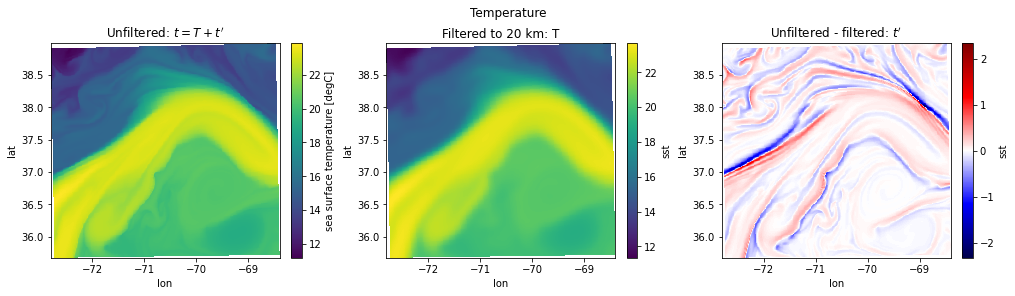

In [32]:
fig, ax = plt.subplots(ncols=3, constrained_layout=True, figsize=(14,4))
fig.suptitle('Temperature')
dataset_to_filter[slice_for_filtered_data].isel(time_counter=time_counter_to_plot).sst.plot(ax=ax[0],x='lon', y='lat')
ax[0].set(title=r'Unfiltered: $t = T + t^\prime$')
dataset_filtered[slice_for_filtered_data].sst.isel(time_counter=time_counter_to_plot).plot(ax=ax[1], x='lon', y='lat')
ax[1].set(title=r'Filtered to %2.0f km: T' % (filter_scale*0.001))
prime.sst[slice_for_filtered_data].isel(time_counter=time_counter_to_plot).plot(ax=ax[2], x='lon', y='lat', cmap='seismic')
ax[2].set(title=r'Unfiltered - filtered: $t^\prime$')
#plt.savefig("maps_temp.png")
plt.show()

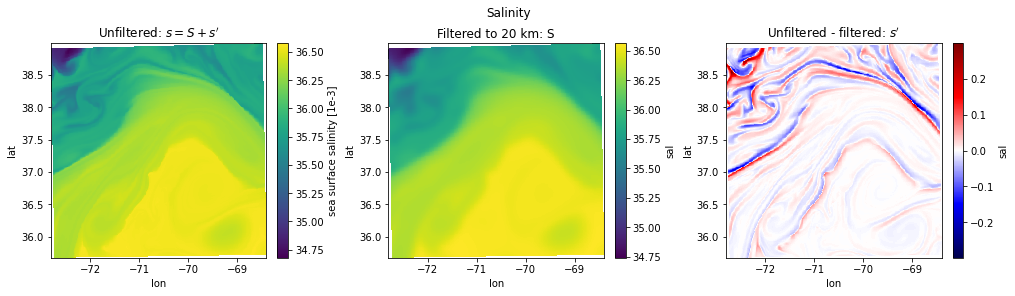

In [33]:
fig, ax = plt.subplots(ncols=3, constrained_layout=True, figsize=(14,4))
fig.suptitle('Salinity')
dataset_to_filter[slice_for_filtered_data].isel(time_counter=time_counter_to_plot).sal.plot(ax=ax[0],x='lon', y='lat')
ax[0].set(title=r'Unfiltered: $s = S + s^\prime$')
dataset_filtered[slice_for_filtered_data].isel(time_counter=time_counter_to_plot).sal.plot(ax=ax[1], x='lon', y='lat')
ax[1].set(title=r'Filtered to %2.0f km: S' % (filter_scale*0.001))
prime.sal[slice_for_filtered_data].isel(time_counter=time_counter_to_plot).plot(ax=ax[2], x='lon', y='lat', cmap='seismic')
ax[2].set(title=r'Unfiltered - filtered: $s^\prime$')
#plt.savefig("maps_sal.png")
plt.show()

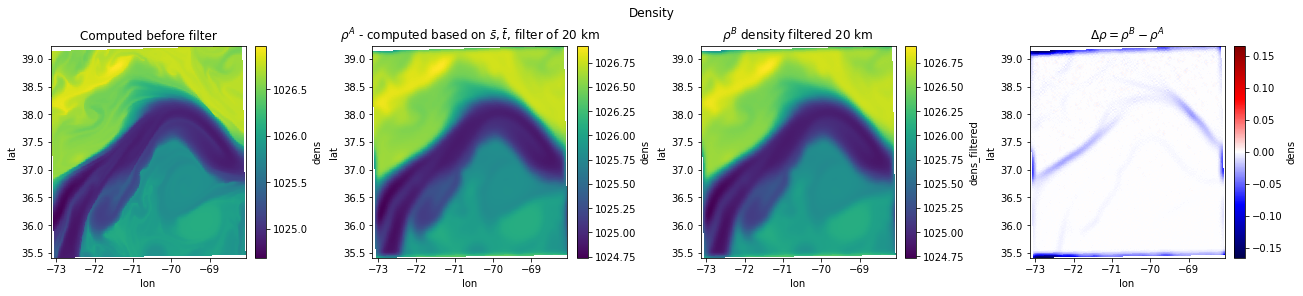

In [34]:
fig, ax = plt.subplots(ncols=4, constrained_layout=True, figsize=(18,4))
fig.suptitle('Density')
dataset_to_filter.isel(time_counter=time_counter_to_plot).dens.plot(ax=ax[0],x='lon', y='lat')
ax[0].set(title=r'Computed before filter')

dataset_filtered.isel(time_counter=time_counter_to_plot).dens.plot(ax=ax[1], x='lon', y='lat')
ax[1].set(title=r'$\rho^A$ - computed based on $\bar{s}, \bar{t}$, filter of %2.0f km' % (filter_scale*0.001))

dataset_filtered.isel(time_counter=time_counter_to_plot).dens_filtered.plot(ax=ax[2], x='lon', y='lat')
ax[2].set(title=r'$\rho^B$ density filtered %2.0f km' % (filter_scale*0.001))

prime.isel(time_counter=time_counter_to_plot).dens.plot(ax=ax[3], x='lon', y='lat', cmap='seismic')
ax[3].set(title=r'$\Delta \rho = \rho^B - \rho^A$')
plt.show()

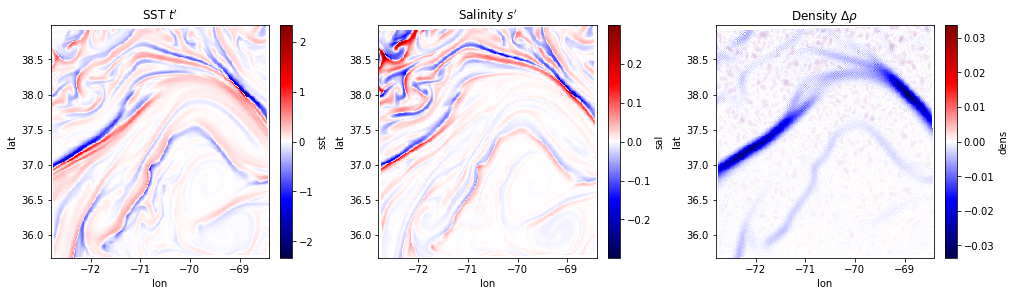

In [35]:
fig, ax = plt.subplots(ncols=3, constrained_layout=True, figsize=(14,4))
prime.sst[slice_for_filtered_data].isel(time_counter=time_counter_to_plot).where(dataset_to_filter.wet_mask > 0).plot(ax=ax[0],x='lon', y='lat', cmap='seismic')
prime.sal[slice_for_filtered_data].isel(time_counter=time_counter_to_plot).where(dataset_to_filter.wet_mask > 0).plot(ax=ax[1],x='lon', y='lat', cmap='seismic')
prime.dens[slice_for_filtered_data].isel(time_counter=time_counter_to_plot).where(dataset_to_filter.wet_mask > 0).plot(ax=ax[2],x='lon', y='lat', cmap='seismic')
ax[0].set(title=r'SST $t^\prime$')
ax[1].set(title=r'Salinity $s^\prime$')
ax[2].set(title=r'Density $\Delta \rho$')
#plt.savefig("maps_primes.png")
plt.show()

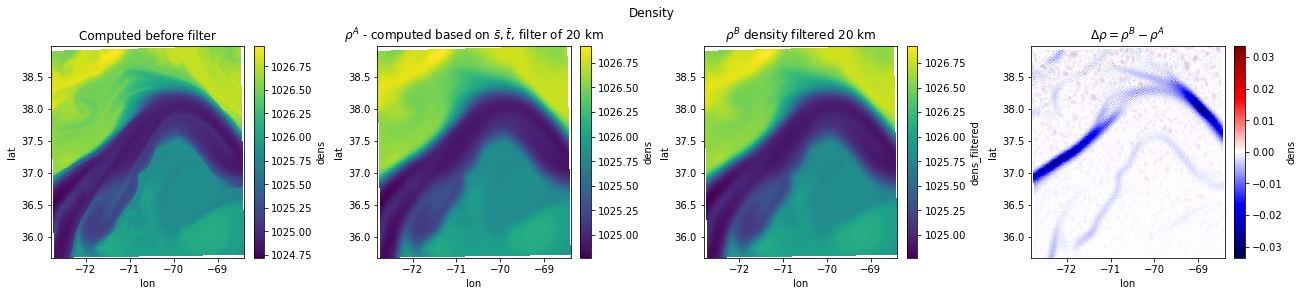

In [36]:
fig, ax = plt.subplots(ncols=4, constrained_layout=True, figsize=(18,4))
fig.suptitle('Density')
dataset_to_filter[slice_for_filtered_data].isel(time_counter=time_counter_to_plot).dens.plot(ax=ax[0],x='lon', y='lat')
ax[0].set(title=r'Computed before filter')

dataset_filtered[slice_for_filtered_data].isel(time_counter=time_counter_to_plot).dens.plot(ax=ax[1], x='lon', y='lat')
ax[1].set(title=r'$\rho^A$ - computed based on $\bar{s}, \bar{t}$, filter of %2.0f km' % (filter_scale*0.001))

dataset_filtered[slice_for_filtered_data].isel(time_counter=time_counter_to_plot).dens_filtered.plot(ax=ax[2], x='lon', y='lat')
ax[2].set(title=r'$\rho^B$ density filtered %2.0f km' % (filter_scale*0.001))

prime[slice_for_filtered_data].isel(time_counter=time_counter_to_plot).dens.plot(ax=ax[3], x='lon', y='lat', cmap='seismic')
ax[3].set(title=r'$\Delta \rho = \rho^B - \rho^A$')

#plt.savefig("maps_density.png")
plt.show()

# 1D Histograms

In [37]:
nb_of_bins = 150

In [38]:
%time binsTprime = np.linspace(prime.sst.min(), prime.sst.max(), nb_of_bins)
histTprime = histogram(prime.sst[slice_for_filtered_data], bins=[binsTprime])

CPU times: user 4.84 s, sys: 3.17 s, total: 8.01 s
Wall time: 8.36 s


In [39]:
%time binsSprime = np.linspace(prime.sal.min(), prime.sal.max(), nb_of_bins)
histSprime = histogram(prime.sal[slice_for_filtered_data], bins=[binsSprime])

CPU times: user 4.74 s, sys: 2.91 s, total: 7.65 s
Wall time: 8.01 s


In [40]:
%time binsDeltaDens = np.linspace(prime.dens.min(), prime.dens.max(), nb_of_bins)
histDeltaDens = histogram(prime.dens[slice_for_filtered_data], bins=[binsDeltaDens])

CPU times: user 9.06 ms, sys: 1.1 ms, total: 10.2 ms
Wall time: 9.72 ms


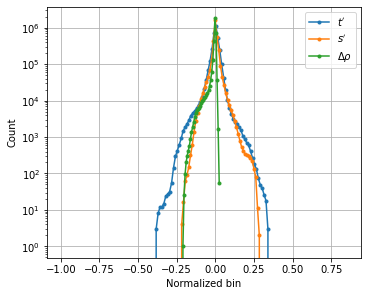

In [41]:
fig, ax = plt.subplots(ncols=1, constrained_layout=True, figsize=(5,4))
ax.plot((binsTprime[:-1] + np.diff(binsTprime)/2)/np.max(np.abs(binsTprime)), histTprime.values, '.-', label=r'$t^\prime$')
ax.plot((binsSprime[:-1] + np.diff(binsSprime)/2)/np.max(np.abs(binsSprime)), histSprime.values, '.-', label=r'$s^\prime$')
ax.plot((binsDeltaDens[:-1] + np.diff(binsDeltaDens)/2)/np.max(np.abs(binsDeltaDens)), histDeltaDens.values, '.-', label=r'$\Delta \rho$')
ax.set(yscale='log', xlabel='Normalized bin', ylabel='Count'); ax.grid()
ax.legend()
plt.show()

# 2D Histograms

In [42]:
bins_T = np.linspace(dataset_to_filter.sst.min(), dataset_to_filter.sst.max(), nb_of_bins)
bins_S = np.linspace(dataset_to_filter.sal.min(), dataset_to_filter.sal.max(), nb_of_bins)

In [43]:
%time histTS_filtered = histogram(dataset_filtered.sal[slice_for_filtered_data], dataset_filtered.sst[slice_for_filtered_data],  bins=[bins_S, bins_T])

CPU times: user 20.4 ms, sys: 1.17 ms, total: 21.5 ms
Wall time: 21 ms


In [44]:
%time histTS_unfiltered = histogram(dataset_to_filter.sal[slice_for_filtered_data], dataset_to_filter.sst[slice_for_filtered_data], bins=[bins_S, bins_T])

CPU times: user 18.2 ms, sys: 61 µs, total: 18.2 ms
Wall time: 18.7 ms


In [45]:
%time histTS_prime = histogram(prime.sal[slice_for_filtered_data], prime.sst[slice_for_filtered_data], bins=[binsSprime, binsTprime])

CPU times: user 18.3 ms, sys: 620 µs, total: 18.9 ms
Wall time: 18.3 ms


In [46]:
max_counter = np.max([histTS_unfiltered.max(), histTS_filtered.max()])

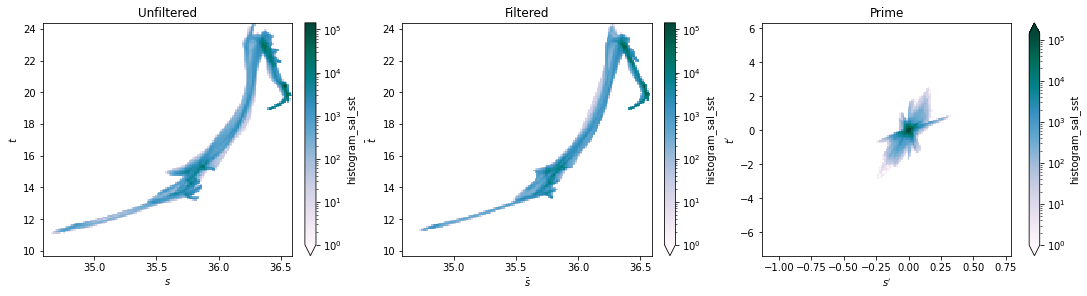

In [47]:
fig, ax = plt.subplots(ncols=3, constrained_layout=True, figsize=(15,4))

#X, Y = np.meshgrid(bins_T[:-1] + np.diff(bins_T)/2, bins_S[:-1] + np.diff(bins_S)/2)
#hist_plot0 = ax[0].pcolormesh(X, Y, histTS_unfiltered, norm=colors.LogNorm(vmin=1, vmax=histTS_unfiltered.max()), cmap='PuBuGn')
hist_plot0 = histTS_unfiltered.T.plot(ax=ax[0], norm=colors.LogNorm(vmin=1, vmax=max_counter), cmap='PuBuGn')
ax[0].set(xlabel=r'$s$', ylabel=r'$t$', title='Unfiltered')

#hist_plot0 = ax[1].pcolormesh(X, Y, histTS_filtered, norm=hist_plot0.norm, cmap=hist_plot0.cmap)
histTS_filtered.T.plot(ax=ax[1], norm=hist_plot0.norm, cmap=hist_plot0.cmap)
ax[1].set(xlabel=r'$\bar{s}$', ylabel=r'$\bar{t}$', title='Filtered')
ax[1].sharex(ax[0]); ax[1].sharey(ax[0])

#X, Y = np.meshgrid(binsTprime[:-1] + np.diff(binsTprime)/2, binsSprime[:-1] + np.diff(binsSprime)/2)
#hist_plot2 = ax[2].pcolormesh(X, Y, histTS_prime, norm=hist_plot0.norm, cmap=hist_plot0.cmap)
histTS_prime.T.plot(ax=ax[2], norm=hist_plot0.norm, cmap=hist_plot0.cmap)
ax[2].set(xlabel=r'$s^\prime$', ylabel=r'$t^\prime$', title='Prime')
#plt.colorbar(hist_plot0, ax=ax[2])

plt.show()

## Density

In [48]:
bins_dens = np.linspace(dataset_to_filter.dens.min(), dataset_to_filter.dens.max(), nb_of_bins)

In [49]:
%time histDensT_unfiltered = histogram(dataset_to_filter.dens[slice_for_filtered_data], dataset_to_filter.sst[slice_for_filtered_data], bins=[bins_dens, bins_T])

CPU times: user 42.2 ms, sys: 3.07 ms, total: 45.3 ms
Wall time: 51 ms


In [50]:
%time histDensT_filtered = histogram(dataset_filtered.dens[slice_for_filtered_data], dataset_filtered.sst[slice_for_filtered_data], bins=[bins_dens, bins_T])

CPU times: user 40.8 ms, sys: 3.84 ms, total: 44.6 ms
Wall time: 44.2 ms


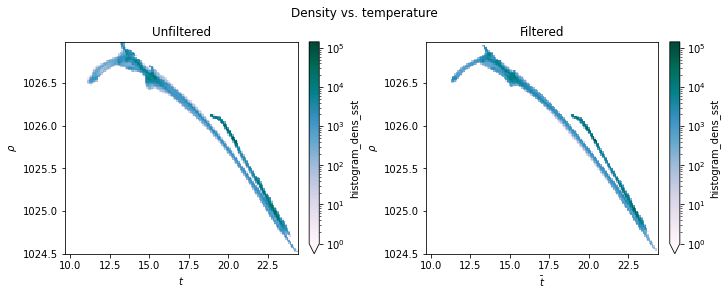

In [51]:
fig, ax = plt.subplots(ncols=2, constrained_layout=True, figsize=(10,4))

fig.suptitle('Density vs. temperature')
hist_plot0 = histDensT_unfiltered.plot(ax=ax[0], norm=colors.LogNorm(vmin=1, vmax=max_counter), cmap='PuBuGn')
ax[0].set(xlabel=r'$t$', ylabel=r'$\rho$', title='Unfiltered')

histDensT_filtered.plot(ax=ax[1], norm=hist_plot0.norm, cmap=hist_plot0.cmap)
ax[1].set(xlabel=r'$\bar{t}$', ylabel=r'$\rho$', title='Filtered')
ax[1].sharex(ax[0]); ax[1].sharey(ax[0])

plt.show()

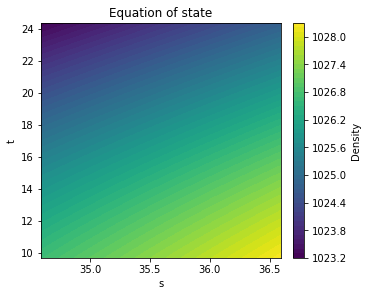

In [52]:
fig, ax = plt.subplots(ncols=1, constrained_layout=True, figsize=(5,4))

X, Y = np.meshgrid(bins_S, bins_T)
Z = sw.dens0(X, Y)

contours = ax.contourf(bins_S, bins_T,Z, levels=50)
fig.colorbar(contours, label='Density')
ax.set(title='Equation of state', xlabel='s', ylabel='t')

plt.show()

In [53]:
%time histDensS_unfiltered = histogram(dataset_to_filter.dens[slice_for_filtered_data], dataset_to_filter.sal[slice_for_filtered_data], bins=[bins_dens, bins_S])

CPU times: user 39.3 ms, sys: 3.61 ms, total: 42.9 ms
Wall time: 42.4 ms


In [54]:
%time histDensS_filtered = histogram(dataset_filtered.dens[slice_for_filtered_data], dataset_filtered.sal[slice_for_filtered_data], bins=[bins_dens, bins_S])

CPU times: user 37.4 ms, sys: 4.27 ms, total: 41.7 ms
Wall time: 41.5 ms


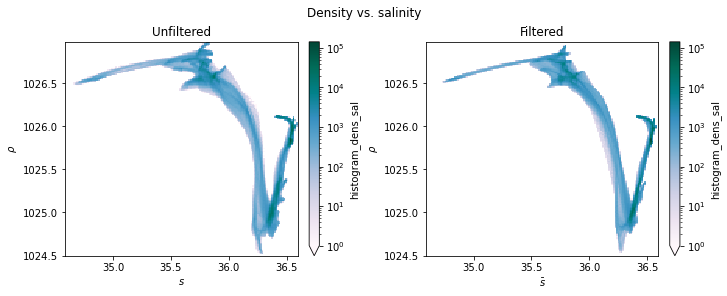

In [55]:
fig, ax = plt.subplots(ncols=2, constrained_layout=True, figsize=(10,4))

fig.suptitle('Density vs. salinity')
hist_plot0 = histDensS_unfiltered.plot(ax=ax[0], norm=colors.LogNorm(vmin=1, vmax=max_counter), cmap='PuBuGn')
ax[0].set(xlabel=r'$s$', ylabel=r'$\rho$', title='Unfiltered')

histDensS_filtered.plot(ax=ax[1], norm=hist_plot0.norm, cmap=hist_plot0.cmap)
ax[1].set(xlabel=r'$\bar{s}$', ylabel=r'$\rho$', title='Filtered')
ax[1].sharex(ax[0]); ax[1].sharey(ax[0])

plt.show()

In [56]:
%time histDeltaDensT = histogram(prime.dens[slice_for_filtered_data], dataset_filtered.sst[slice_for_filtered_data], bins=[binsDeltaDens, bins_T])

CPU times: user 37.5 ms, sys: 4.2 ms, total: 41.7 ms
Wall time: 40.7 ms


In [57]:
%time histDeltaDens_Tprime = histogram(prime.dens[slice_for_filtered_data], prime.sst[slice_for_filtered_data], bins=[binsDeltaDens, binsTprime])

CPU times: user 38.1 ms, sys: 3.05 ms, total: 41.1 ms
Wall time: 40.2 ms


In [58]:
%time histDeltaDensS = histogram(prime.dens[slice_for_filtered_data], dataset_filtered.sal[slice_for_filtered_data], bins=[binsDeltaDens, bins_S])

CPU times: user 38.2 ms, sys: 4.13 ms, total: 42.3 ms
Wall time: 41 ms


In [59]:
%time histDeltaDens_Sprime = histogram(prime.dens[slice_for_filtered_data], prime.sal[slice_for_filtered_data], bins=[binsDeltaDens, binsSprime])

CPU times: user 42.2 ms, sys: 3.07 ms, total: 45.3 ms
Wall time: 43.6 ms


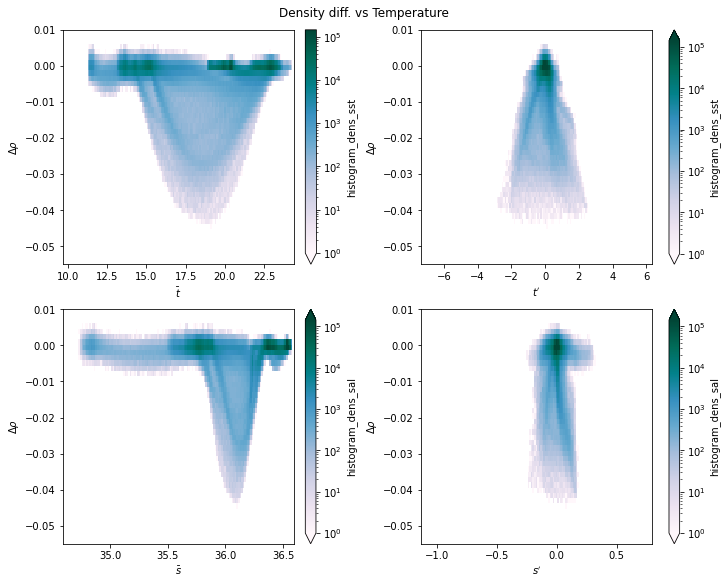

In [60]:
fig, ax = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(10,8))

fig.suptitle('Density diff. vs Temperature')

hist_plot0 = histDeltaDensT.plot(ax=ax[0,0], norm=colors.LogNorm(vmin=1, vmax=max_counter), cmap='PuBuGn')
ax[0,0].set(xlabel=r'$\bar{t}$', ylabel=r'$\Delta \rho$', ylim=[-0.055,0.01])

histDeltaDens_Tprime.plot(ax=ax[0,1], norm=hist_plot0.norm, cmap=hist_plot0.cmap)
ax[0,1].set(xlabel=r'$t^\prime$', ylabel=r'$\Delta \rho$')
ax[0,1].sharey(ax[0,0])

histDeltaDensS.plot(ax=ax[1,0], norm=hist_plot0.norm, cmap='PuBuGn')
ax[1,0].set(xlabel=r'$\bar{s}$', ylabel=r'$\Delta \rho$')
ax[1,0].sharey(ax[0,0])

histDeltaDens_Sprime.plot(ax=ax[1,1], norm=hist_plot0.norm, cmap=hist_plot0.cmap)
ax[1,1].set(xlabel=r'$s^\prime$', ylabel=r'$\Delta \rho$')
ax[1,1].sharey(ax[0,0])

plt.show()

# Complex Density Ratio

## Gradients

In [61]:
def gradx(dataArray, delta_x) :
    return (dataArray.shift(x=-1) - dataArray)/delta_x
#     dx1 = delta_x.isel(x=slice(0,-1))
#     dx2 = delta_x.isel(x=slice(0,None))
#     a = -(dx2)/(dx1 * (dx1 + dx2))
#     b = (dx2 - dx1) / (dx1 * dx2)
#     c = dx1 / (dx2 * (dx1 + dx2))
#     # fix the shape for broadcasting
#     shape = np.ones(N, dtype=int)
#     shape[axis] = -1
#     a.shape = b.shape = c.shape = shape
#     # 1D equivalent -- out[1:-1] = a * f[:-2] + b * f[1:-1] + c * f[2:]
#     slice1 = slice(1, -1)
#     slice2 = slice(None, -2)
#     slice3 = slice(1, -1)
#     slice4 = slice(2, None)
#     out[x=slice1] = a * f[x=slice2] + b * f[x=slice3] + c * f[x=slice4]

In [62]:
def grady(dataArray, delta_y) :
    return (dataArray.shift(y=-1) - dataArray)/delta_y

In [63]:
dataset_filtered = xr.merge([dataset_filtered, xr.DataArray(gradx(dataset_filtered.sal, dataset_filtered.e1t), name='sal_grad_x'),
                       xr.DataArray(gradx(dataset_filtered.sst, dataset_filtered.e1t), name='temp_grad_x'),
                       xr.DataArray(grady(dataset_filtered.sal, dataset_filtered.e2t), name='sal_grad_y'),
                       xr.DataArray(grady(dataset_filtered.sst, dataset_filtered.e2t), name='temp_grad_y')])

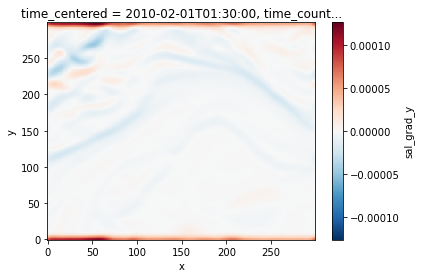

In [64]:
dataset_filtered.isel(time_counter=time_counter_to_plot).sal_grad_y.plot()

## Thermal and haline expansion ratios

In [65]:
def alpha_beta(tem,salt):
    zt=tem-10  #potential temperature anomaly
    zs=salt-35 #abs salinity anomaly
    zh=0.4804548 # depth at the surface
    rn_a0=1.6550e-1 # thermal expansion coeff
    rn_b0=7.6554e-1 # saline  expansion coeff
    rn_lambda1=5.9520e-2 #cabbeling coeff. in T^2
    rn_mu1=1.4970e-4 #thermobaric coeff. in T
    rn_nu=2.4341e-3 #cabbeling coeff. in theta*salt  
    rau0=1026  #volumic mass of reference     [kg/m3]
    r1_rau0= 1/rau0
    rn_lambda2=5.4914e-4 #cabbeling coeff. in S^2
    rn_mu2=1.1090e-5 #thermobaric coeff. in S
    zn  = rn_a0 * ( 1. + rn_lambda1*zt + rn_mu1*zh ) + rn_nu*zs
    alpha=zn * r1_rau0 
    zn  = rn_b0 * ( 1. - rn_lambda2*zs - rn_mu2*zh ) - rn_nu*zt
    beta=zn * r1_rau0
    return xr.DataArray(alpha, name='alpha'), xr.DataArray(beta, name='beta')

In [66]:
alpha_array, beta_array = alpha_beta(dataset_filtered.sst, dataset_filtered.sal)

In [67]:
dataset_filtered = xr.merge([alpha_array, beta_array, dataset_filtered], compat='override')

In [68]:
def complex_R(alpha, beta, Tx, Ty, Sx, Sy) :
    #return alpha*(Tx + 1j*Ty)/(beta*(Sx+1j*Sy))
    return alpha*((Tx*Sx + Ty*Sy) + 1j*(Ty*Sx-Tx*Sy))/(beta*(Sx**2 + Sy**2))

In [69]:
dataset_filtered = xr.merge([xr.DataArray(complex_R(dataset_filtered.alpha, dataset_filtered.beta, dataset_filtered.temp_grad_x, dataset_filtered.temp_grad_y, \
                                                    dataset_filtered.sal_grad_x, dataset_filtered.sal_grad_y),
                name='R'), dataset_filtered], compat='override')

## Turner Angle

In [70]:
dataset_filtered = xr.merge([xr.DataArray(np.angle(dataset_filtered.R), dims=['time_counter', 'y','x'], name='phi'), dataset_filtered], compat='override')

In [71]:
dataset_filtered = xr.merge([xr.DataArray(np.abs(dataset_filtered.R), dims=['time_counter', 'y','x'], name='absR'), dataset_filtered], compat='override')

In [72]:
dataset_filtered[slice_for_filtered_data].absR.max().values

array(11823.65975428)

In [73]:
dataset_filtered = xr.merge([xr.DataArray(np.arctan(np.abs(dataset_filtered.R)), dims=['time_counter', 'y','x'], name='Tu'), dataset_filtered], compat='override')

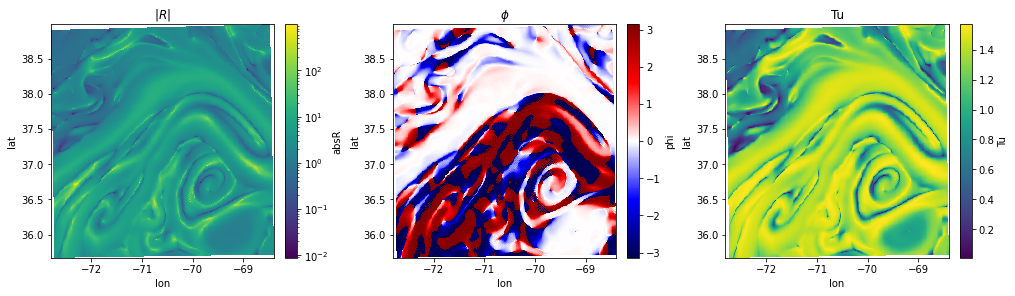

In [74]:
fig, ax = plt.subplots(ncols=3, constrained_layout=True, figsize=(14,4))
dataset_filtered.isel(time_counter=time_counter_to_plot).where(dataset_to_filter.wet_mask > 0).absR[slice_for_filtered_data].plot(ax=ax[0],x='lon', y='lat', \
                                                                                                                                  norm=colors.LogNorm())
dataset_filtered.isel(time_counter=time_counter_to_plot).where(dataset_to_filter.wet_mask > 0).phi[slice_for_filtered_data].plot(ax=ax[1],x='lon', y='lat', cmap='seismic')
dataset_filtered.isel(time_counter=time_counter_to_plot).where(dataset_to_filter.wet_mask > 0).Tu[slice_for_filtered_data].plot(ax=ax[2],x='lon', y='lat')
ax[0].set(title=r'$|R|$')
ax[1].set(title=r'$\phi$')
ax[2].set(title=r'Tu')
plt.show()

## Histograms

In [75]:
bins_turner = np.linspace(dataset_filtered.Tu.min(), dataset_filtered.Tu.max(), nb_of_bins)

In [76]:
%time histDeltaTu = histogram(prime.dens[slice_for_filtered_data], dataset_filtered.Tu[slice_for_filtered_data], bins=[binsDeltaDens, bins_turner])

CPU times: user 217 ms, sys: 35.6 ms, total: 252 ms
Wall time: 252 ms


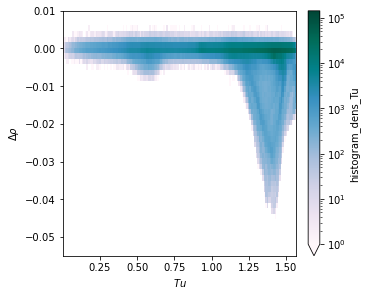

In [77]:
fig, ax = plt.subplots(ncols=1, constrained_layout=True, figsize=(5,4))
histDeltaTu.plot(ax=ax, norm=colors.LogNorm(vmin=1, vmax=max_counter), cmap='PuBuGn')
ax.set(xlabel=r'$Tu$', ylabel=r'$\Delta \rho$', ylim=[-0.055,0.01])
plt.show()

In [78]:
bins_phi = np.linspace(dataset_filtered.phi.min(), dataset_filtered.phi.max(), nb_of_bins)
%time histDeltaPhi = histogram(prime.dens[slice_for_filtered_data], dataset_filtered.phi[slice_for_filtered_data], bins=[binsDeltaDens, bins_phi])

CPU times: user 241 ms, sys: 20.9 ms, total: 262 ms
Wall time: 264 ms


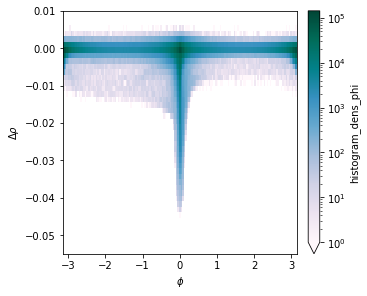

In [79]:
fig, ax = plt.subplots(ncols=1, constrained_layout=True, figsize=(5,4))
histDeltaPhi.plot(ax=ax, norm=colors.LogNorm(vmin=1, vmax=max_counter), cmap='PuBuGn')
ax.set(xlabel=r'$\phi$', ylabel=r'$\Delta \rho$', ylim=[-0.055,0.01])
plt.show()

In [80]:
bins_absR = np.logspace(np.log10(dataset_filtered.absR.min().values), np.log10(dataset_filtered.absR.max().values), nb_of_bins)
%time histabsRe = histogram(prime.dens[slice_for_filtered_data], dataset_filtered.absR[slice_for_filtered_data], bins=[binsDeltaDens, bins_absR])

CPU times: user 194 ms, sys: 4.82 ms, total: 198 ms
Wall time: 198 ms


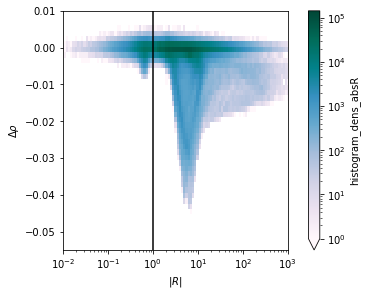

In [81]:
fig, ax = plt.subplots(ncols=1, constrained_layout=True, figsize=(5,4))
histabsRe.plot(ax=ax, norm=colors.LogNorm(vmin=1, vmax=max_counter), cmap='PuBuGn')
ax.set(xlabel=r'$|R|$', ylabel=r'$\Delta \rho$', ylim=[-0.055,0.01], xlim=[1e-2,1e3], xscale='log')
ax.axvline(x=1, color='k')
plt.show()

## Grads of temp and salinity

In [82]:
dataset_filtered = xr.merge([xr.DataArray(np.sqrt(dataset_filtered.temp_grad_x**2+dataset_filtered.temp_grad_y**2),
                                          dims=['time_counter', 'y','x'], name='grad_temp'), dataset_filtered], compat='override')

In [83]:
dataset_filtered = xr.merge([xr.DataArray(np.sqrt(dataset_filtered.sal_grad_x**2+dataset_filtered.sal_grad_y**2),
                                          dims=['time_counter', 'y','x'], name='grad_sal'), dataset_filtered], compat='override')

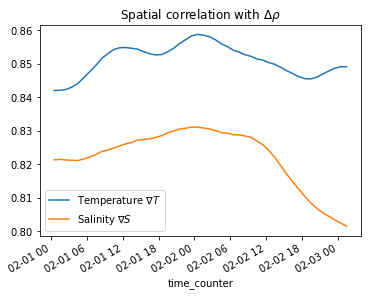

In [84]:
fig, ax = plt.subplots(ncols=1, constrained_layout=True, figsize=(5,4))
xr.corr(dataset_filtered.grad_temp, -prime.dens, dim=['x', 'y']).plot(label=r'Temperature $\nabla T$')
xr.corr(dataset_filtered.grad_sal, -prime.dens, dim=['x', 'y']).plot(label=r'Salinity $\nabla S$')
ax.set(title=r'Spatial correlation with $\Delta \rho$')
ax.legend()
#plt.savefig("corr_delta_rho_vs_nabla_s_nabla_b.png")
plt.show()

In [85]:
bins_grad_temp = np.linspace(dataset_filtered.grad_temp.min().values, dataset_filtered.grad_temp.max().values, nb_of_bins)
%time histGradTemp = histogram(prime.dens[slice_for_filtered_data], dataset_filtered.grad_temp[slice_for_filtered_data], bins=[binsDeltaDens, bins_grad_temp])

CPU times: user 180 ms, sys: 19.5 ms, total: 199 ms
Wall time: 199 ms


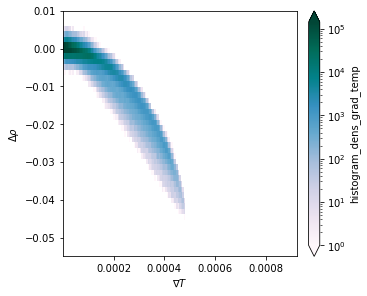

In [86]:
fig, ax = plt.subplots(ncols=1, constrained_layout=True, figsize=(5,4))
histGradTemp.plot(ax=ax, norm=colors.LogNorm(vmin=1, vmax=max_counter), cmap='PuBuGn')
ax.set(xlabel=r'$\nabla T$', ylabel=r'$\Delta \rho$', ylim=[-0.055,0.01])
ax.axvline(x=1, color='k')
#plt.savefig("pdf_delta_rho_vs_nabla_T.png")
plt.show()

In [87]:
bins_grad_sal = np.linspace(dataset_filtered.grad_sal.min().values, dataset_filtered.grad_sal.max().values, nb_of_bins)
%time histGradSal = histogram(prime.dens[slice_for_filtered_data], dataset_filtered.grad_sal[slice_for_filtered_data], bins=[binsDeltaDens, bins_grad_sal])

CPU times: user 176 ms, sys: 21.6 ms, total: 197 ms
Wall time: 198 ms


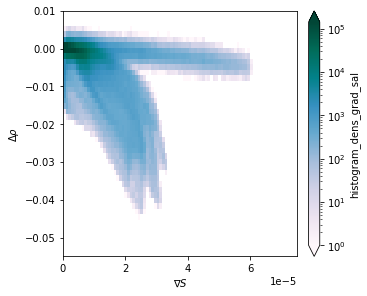

In [88]:
fig, ax = plt.subplots(ncols=1, constrained_layout=True, figsize=(5,4))
histGradSal.plot(ax=ax, norm=colors.LogNorm(vmin=1, vmax=max_counter), cmap='PuBuGn')
ax.set(xlabel=r'$\nabla S$', ylabel=r'$\Delta \rho$', ylim=[-0.055,0.01], xlim=[0,0.75e-4])
#plt.savefig("pdf_delta_rho_vs_nabla_Sal.png")
plt.show()

## Grads of buoyancy and spiciness

In [89]:
dataset_filtered = xr.merge([xr.DataArray(dataset_filtered.alpha*np.sqrt(dataset_filtered.temp_grad_x**2+dataset_filtered.temp_grad_y**2)-\
                                          dataset_filtered.beta*np.sqrt(dataset_filtered.sal_grad_x**2+dataset_filtered.sal_grad_y**2), \
                                          dims=['time_counter', 'y','x'], name='grad_buoyancy'), dataset_filtered], compat='override')

In [90]:
dataset_filtered = xr.merge([xr.DataArray(dataset_filtered.alpha*np.sqrt(dataset_filtered.temp_grad_x**2+dataset_filtered.temp_grad_y**2)+\
                                          dataset_filtered.beta*np.sqrt(dataset_filtered.sal_grad_x**2+dataset_filtered.sal_grad_y**2), \
                                          dims=['time_counter', 'y','x'], name='grad_spicyness'), dataset_filtered], compat='override')

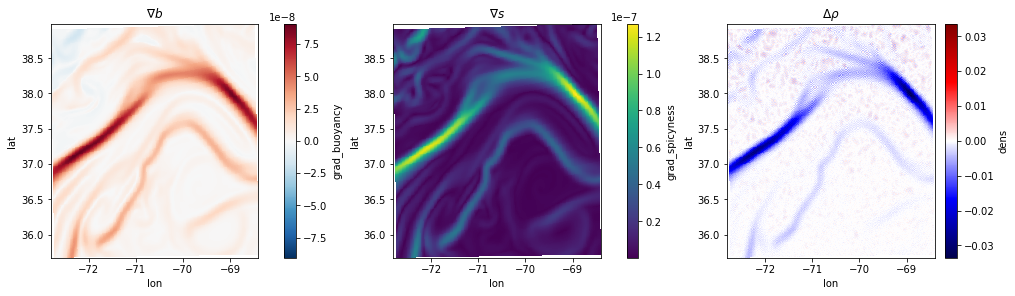

In [91]:
fig, ax = plt.subplots(ncols=3, constrained_layout=True, figsize=(14,4))
dataset_filtered.isel(time_counter=time_counter_to_plot).where(dataset_to_filter.wet_mask > 0).grad_buoyancy[slice_for_filtered_data].plot(ax=ax[0],x='lon', y='lat')
dataset_filtered.isel(time_counter=time_counter_to_plot).where(dataset_to_filter.wet_mask > 0).grad_spicyness[slice_for_filtered_data].plot(ax=ax[1],x='lon', y='lat')
prime.dens[slice_for_filtered_data].isel(time_counter=time_counter_to_plot).where(dataset_to_filter.wet_mask > 0).plot(ax=ax[2],x='lon', y='lat', cmap='seismic')
ax[0].set(title=r'$\nabla b$')
ax[1].set(title=r'$\nabla s$')
ax[2].set(title=r'$\Delta \rho$')
#plt.savefig("maps_delta_rho_nabla_s_nabla_b.png")
plt.show()

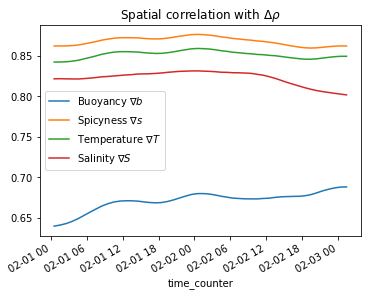

In [92]:
fig, ax = plt.subplots(ncols=1, constrained_layout=True, figsize=(5,4))
xr.corr(dataset_filtered.grad_buoyancy, -prime.dens, dim=['x', 'y']).plot(label=r'Buoyancy $\nabla b$')
xr.corr(dataset_filtered.grad_spicyness, -prime.dens, dim=['x', 'y']).plot(label=r'Spicyness $\nabla s$')
xr.corr(dataset_filtered.grad_temp, -prime.dens, dim=['x', 'y']).plot(label=r'Temperature $\nabla T$')
xr.corr(dataset_filtered.grad_sal, -prime.dens, dim=['x', 'y']).plot(label=r'Salinity $\nabla S$')
#xr.corr(dataset_filtered.Tu, -prime.dens, dim=['x', 'y']).plot()
#xr.corr(dataset_filtered.absR, -prime.dens, dim=['x', 'y']).plot()
ax.set(title=r'Spatial correlation with $\Delta \rho$')
ax.legend()
#plt.savefig("corr_delta_rho_vs_nabla_s_nabla_b.png")
plt.show()

In [93]:
bins_grad_spicy = np.linspace(dataset_filtered.grad_spicyness.min().values, dataset_filtered.grad_spicyness.max().values, nb_of_bins)
%time histGradSpicy = histogram(prime.dens[slice_for_filtered_data], dataset_filtered.grad_spicyness[slice_for_filtered_data], bins=[binsDeltaDens, bins_grad_spicy])

CPU times: user 177 ms, sys: 27.1 ms, total: 204 ms
Wall time: 205 ms


In [98]:
#summer_spicy_hist = xr.open_dataset("summer_spicy_hist.nc")

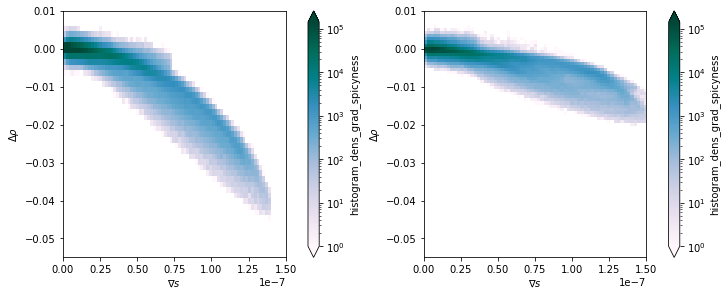

In [97]:
fig, ax = plt.subplots(ncols=2, constrained_layout=True, figsize=(10,4))
histGradSpicy.plot(ax=ax[0], norm=colors.LogNorm(vmin=1, vmax=max_counter), cmap='PuBuGn')
summer_spicy_hist.histogram_dens_grad_spicyness.plot(ax=ax[1], norm=colors.LogNorm(vmin=1, vmax=max_counter), cmap='PuBuGn')
ax[0].set(xlabel=r'$\nabla s$', ylabel=r'$\Delta \rho$', ylim=[-0.055,0.01], xlim=[0,1.5e-7])
ax[1].set(xlabel=r'$\nabla s$', ylabel=r'$\Delta \rho$', ylim=[-0.055,0.01], xlim=[0,1.5e-7])
plt.savefig("pdf_delta_rho_vs_nabla_s.png")
plt.show()

In [ ]:
bins_grad_buo = np.linspace(dataset_filtered.grad_buoyancy.min().values, dataset_filtered.grad_buoyancy.max().values, nb_of_bins)
%time histGradBuo = histogram(prime.dens[slice_for_filtered_data], dataset_filtered.grad_buoyancy[slice_for_filtered_data], bins=[binsDeltaDens, bins_grad_buo])

In [ ]:
fig, ax = plt.subplots(ncols=1, constrained_layout=True, figsize=(5,4))
histGradBuo.plot(ax=ax, norm=colors.LogNorm(vmin=1, vmax=max_counter), cmap='PuBuGn')
ax.set(xlabel=r'$\nabla b$', ylabel=r'$\Delta \rho$', ylim=[-0.055,0.01])
plt.show()